# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# base url for api call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# store data for input into data frame later
city_data = []

# set initial counts to track records and sets during processing
record_num = 0
set_num = 1

# print statement for beginning of data retrieval  
print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    city_url = base_url + "&q=" + city
    
    
    try:
        # pull response of given city
        response = requests.get(city_url).json()
        
        # locate data for each attribute in the response
        lat = response['coord']['lat']
        lon = response['coord']['lon']
        max_temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        
        # append data pulled from response into city_data list
        city_data.append({"City" : city,
                         "Lat" : lat,
                         "Lon" : lon,
                         "Max Temp" : max_temp,
                         "Humidity" : humidity,
                         "Cloudiness" : cloudiness,
                         "Wind Speed" : wind_speed,
                         "Country" : country,
                         "Date" : date})
           
        # increase the record count by 1
        record_num += 1
        
        # print statement to track processing
        print(f'Processing Record {record_num} of Set {set_num} | {city}')
    
    # if city is not found, print statement below and continue processing
    except:
        print(f'{city} not found. Skipping...')
        
        
    # if statement to handle the number of sets
    if record_num == 50:
        set_num += 1
        record_num = 0
        
# indicate that data loading is complete
print("--------------------------")
print(f'Data Retrieval Complete')
print("--------------------------")


        


Beginning Data Retrieval
------------------------
Processing record for 1 of Set 1 | narsaq
Processing record for 2 of Set 1 | mataura
Processing record for 3 of Set 1 | georgetown
Processing record for 4 of Set 1 | listvyanskiy
Processing record for 5 of Set 1 | mar del plata
Processing record for 6 of Set 1 | namibe
saleaula not found. Skipping...
Processing record for 7 of Set 1 | bambous virieux
Processing record for 8 of Set 1 | lebu
Processing record for 9 of Set 1 | ocean city
Processing record for 10 of Set 1 | tahta
Processing record for 11 of Set 1 | rikitea
Processing record for 12 of Set 1 | avarua
Processing record for 13 of Set 1 | hermanus
Processing record for 14 of Set 1 | hithadhoo
Processing record for 15 of Set 1 | punta arenas
Processing record for 16 of Set 1 | east london
Processing record for 17 of Set 1 | faanui
kamenskoye not found. Skipping...
Processing record for 18 of Set 1 | souillac
Processing record for 19 of Set 1 | albany
Processing record for 20 of S

Processing record for 21 of Set 4 | san patricio
mutsamudu not found. Skipping...
Processing record for 22 of Set 4 | ballina
Processing record for 23 of Set 4 | cayenne
Processing record for 24 of Set 4 | nanortalik
Processing record for 25 of Set 4 | zig
Processing record for 26 of Set 4 | hami
Processing record for 27 of Set 4 | oussouye
warqla not found. Skipping...
Processing record for 28 of Set 4 | coihaique
Processing record for 29 of Set 4 | bilma
Processing record for 30 of Set 4 | sur
Processing record for 31 of Set 4 | mogadishu
Processing record for 32 of Set 4 | morros
Processing record for 33 of Set 4 | loknya
Processing record for 34 of Set 4 | kodinsk
Processing record for 35 of Set 4 | severo-kurilsk
samusu not found. Skipping...
Processing record for 36 of Set 4 | lasa
Processing record for 37 of Set 4 | inhambane
hayato not found. Skipping...
Processing record for 38 of Set 4 | te anau
Processing record for 39 of Set 4 | kavaratti
Processing record for 40 of Set 4 |

Processing record for 37 of Set 7 | tokonou
Processing record for 38 of Set 7 | kruisfontein
Processing record for 39 of Set 7 | aklavik
Processing record for 40 of Set 7 | nome
Processing record for 41 of Set 7 | avsyunino
Processing record for 42 of Set 7 | raga
nguiu not found. Skipping...
Processing record for 43 of Set 7 | kandla
Processing record for 44 of Set 7 | karema
Processing record for 45 of Set 7 | santa cruz cabralia
Processing record for 46 of Set 7 | quatre cocos
Processing record for 47 of Set 7 | xinan
Processing record for 48 of Set 7 | waipawa
Processing record for 49 of Set 7 | grand-lahou
Processing record for 50 of Set 7 | sussex
Processing record for 1 of Set 8 | santa isabel do rio negro
Processing record for 2 of Set 8 | kismayo
Processing record for 3 of Set 8 | phangnga
Processing record for 4 of Set 8 | shelburne
Processing record for 5 of Set 8 | aitape
Processing record for 6 of Set 8 | los llanos de aridane
Processing record for 7 of Set 8 | huangmei
Pr

Processing record for 13 of Set 11 | gombong
Processing record for 14 of Set 11 | mandan
Processing record for 15 of Set 11 | asyut
karaul not found. Skipping...
karkaralinsk not found. Skipping...
Processing record for 16 of Set 11 | craig
Processing record for 17 of Set 11 | razole
Processing record for 18 of Set 11 | westport
Processing record for 19 of Set 11 | pandan
Processing record for 20 of Set 11 | bemidji
Processing record for 21 of Set 11 | praia
Processing record for 22 of Set 11 | homer
Processing record for 23 of Set 11 | heihe
Processing record for 24 of Set 11 | beloha
Processing record for 25 of Set 11 | ambon
Processing record for 26 of Set 11 | adrar
Processing record for 27 of Set 11 | ligayan
Processing record for 28 of Set 11 | otaru
Processing record for 29 of Set 11 | kanturk
Processing record for 30 of Set 11 | penzance
Processing record for 31 of Set 11 | nelson bay
beypur not found. Skipping...
Processing record for 32 of Set 11 | bathurst
Processing record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
# create a data frame using city_data from above
city_data_df = pd.DataFrame(city_data)

# output data to csv
city_data_df.to_csv('city_data.csv', index=False, header=True)

# show data frame
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,narsaq,60.9167,-46.0500,32.22,36,2,7.58,GL,1634563253
1,mataura,-46.1927,168.8643,52.70,60,99,9.35,NZ,1634563254
2,georgetown,5.4112,100.3354,84.15,76,20,0.00,MY,1634563254
3,listvyanskiy,54.4399,83.4984,45.19,76,5,6.98,RU,1634563255
4,mar del plata,-38.0023,-57.5575,57.99,27,0,8.01,AR,1634563108


In [10]:
# display the descriptive statisitics of the city_data_df
city_data_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.513647,20.572145,61.739872,68.848263,53.718464,8.267934,1.634563e+09
std,33.465802,93.684880,21.168121,22.622495,40.433472,5.863465,7.334069e+01
min,-54.800000,-175.200000,-13.410000,4.000000,0.000000,0.000000,1.634563e+09
25%,-7.808800,-66.047300,47.985000,57.000000,10.000000,3.990000,1.634563e+09
50%,22.850000,28.185800,63.720000,74.000000,61.000000,7.160000,1.634563e+09
75%,48.702700,103.088050,79.885000,86.000000,98.000000,11.465000,1.634563e+09
max,78.218600,179.316700,102.270000,100.000000,100.000000,41.110000,1.634563e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# check to see if there are any cities with humidity > 100%
high_humid_df = city_data_df[(city_data_df['Humidity'] > 100)]
high_humid_df

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [12]:
#  Get the indices of cities that have humidity over 100%.
high_humid_df.index

Int64Index([], dtype='int64')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

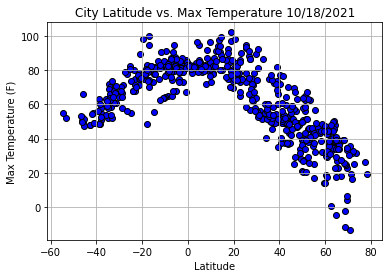

<Figure size 432x288 with 0 Axes>

In [18]:
# construct scatter plot for lat vs. max temp
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker = 'o', facecolors = 'blue', edgecolors = 'black')

# give graph labels and grid
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# show the plot
plt.show()

# save the plot as png
plt.savefig("City Latitude vs. Max Temperature.png")

### Latitude vs. Temperature Scatterplot Observations
This scatter plot maps over 500 randomly selected cities' latitudes against their max temperatures. The curve of the plot demonstrates that cities closest to the equator will have greater max temperatures, and they lower on either side of the equator as you move further away in latitude. In addition, the data was pulled mid-October, which is summer in the southern hemisphere, so those temperatures will be higher on average than those of the northern hemisphere, where it is fall/winter.

## Latitude vs. Humidity Plot

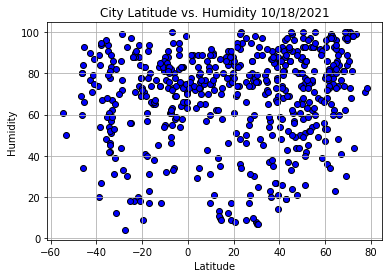

<Figure size 432x288 with 0 Axes>

In [19]:
# construct scatter plot for lat vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o', facecolors = 'blue', edgecolors = 'black')

# give graph labels and grid
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# show the plot
plt.show()

# save the plot as png
plt.savefig("City Latitude vs. Humidity.png")

### Latitude vs. Humidity Scatterplot Observations
This scatter plot maps over 500 randomly selected cities' latitudes against their humidity. This plot shows no substantial correlation between a city's latitude and it's humidity on a particular day.

## Latitude vs. Cloudiness Plot

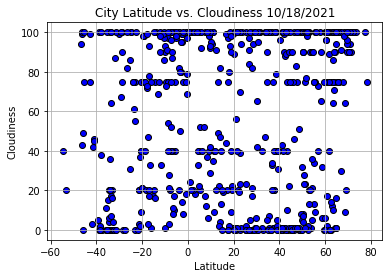

<Figure size 432x288 with 0 Axes>

In [20]:
# construct scatter plot for lat vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o', facecolors = 'blue', edgecolors = 'black')

# give graph labels and grid
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# show the plot
plt.show()

# save the plot as png
plt.savefig("City Latitude vs. Cloudiness.png")

### Latitude vs. Cloudiness Scatterplot Observations
This scatter plot maps over 500 randomly selected cities' latitudes against their cloudiness. This plot shows no substantial correlation between a city's latitude and it's cloudiness on a particular day.

## Latitude vs. Wind Speed Plot

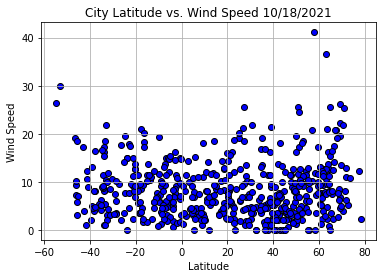

<Figure size 432x288 with 0 Axes>

In [21]:
# construct scatter plot for lat vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o', facecolors = 'blue', edgecolors = 'black')

# give graph labels and grid
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# show the plot
plt.show()

# save the plot as png
plt.savefig("City Latitude vs. Wind Speed.png")

### Latitude vs. Wind Speed Scatterplot Observations
This scatter plot maps over 500 randomly selected cities' latitudes against their cloudiness. This plot shows no substantial correlation between a city's latitude and it's wind speed on a particular day.

## Linear Regression

In [23]:
# create northern and southern hemisphere dataframes 
# northern hemi lat > 0, southern hemi lat < 0
northern_hemi = city_data_df.loc[city_data_df['Lat'] > 0]
southern_hemi = city_data_df.loc[city_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7505443610453759


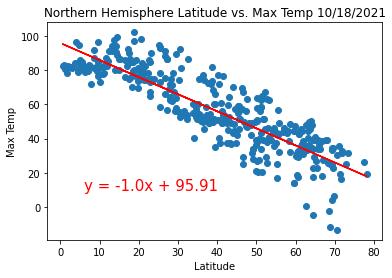

<Figure size 432x288 with 0 Axes>

In [37]:
# construct linear regression and scatter plot 
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Hemisphere Latitude vs. Max Temp {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save the plot as png
plt.savefig("Northern Hemisphere Latitude vs. Max Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6026984563622111


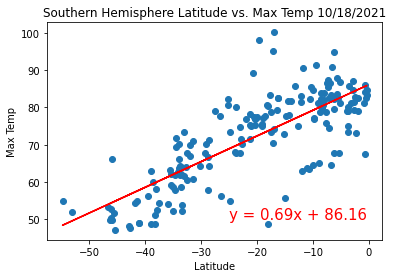

<Figure size 432x288 with 0 Axes>

In [38]:
# construct linear regression and scatter plot 
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25, 50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Southern Hemisphere Latitude vs. Max Temp {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save the plot as png
plt.savefig("Southern Hemisphere Latitude vs. Max Temperature.png")

### North/South Latitude vs. Max Temp Scatterplot Observations
These scatter plots map over 500 randomly selected cities' latitudes in the northern and southern hemispheres against their max temperatures. Both of the scatter plots show a strong correlation between latitude and temperature. The close to the equator, the higher the temperature in both hemispheres.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.02447203203320608


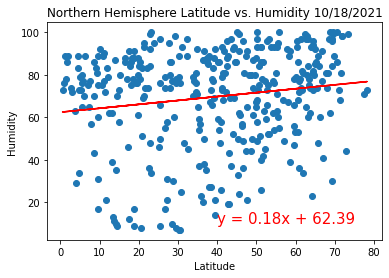

<Figure size 432x288 with 0 Axes>

In [39]:
# construct linear regression and scatter plot 
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Northern Hemisphere Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save the plot as png
plt.savefig("Northern Hemisphere Latitude vs. Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007371029141800509


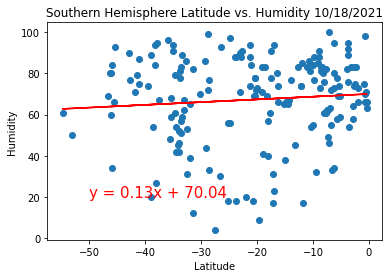

<Figure size 432x288 with 0 Axes>

In [40]:
# construct linear regression and scatter plot 
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'Southern Hemisphere Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save the plot as png
plt.savefig("Southern Hemisphere Latitude vs. Humidity.png")

### North/South Latitude vs. Humidity Scatterplot Observations
These scatter plots map over 500 randomly selected cities' latitudes in the northern and southern hemispheres against their humidity. Both of the scatter plots show that there is no correlation between latitude and humidity. Both linear regression equations have slopes close to zero, which suggests a weak correlation between the two attributes being displayed.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016109117892084714


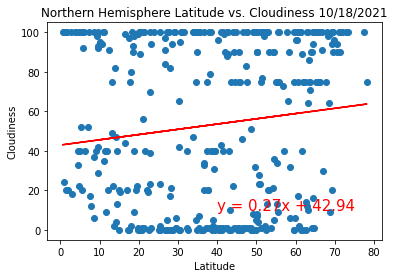

<Figure size 432x288 with 0 Axes>

In [41]:
# construct linear regression and scatter plot 
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Northern Hemisphere Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save the plot as png
plt.savefig("Northern Hemisphere Latitude vs. Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0892094437719014


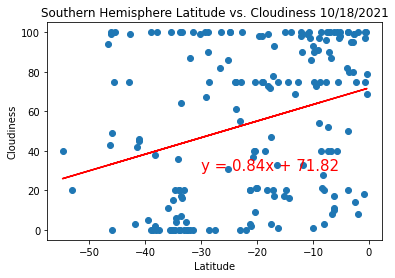

<Figure size 432x288 with 0 Axes>

In [42]:
# construct linear regression and scatter plot 
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Southern Hemisphere Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save the plot as png
plt.savefig("Southern Hemisphere Latitude vs. Cloudiness.png")

### North/South Latitude vs. Cloudiness Scatterplot Observations
These scatter plots map over 500 randomly selected cities' latitudes in the northern and southern hemispheres against their cloudiness. For this particular set of randomized cities, the plot of the northern hemisphere cities shows no correlation, which is evidenced by the slope of the linear regression equation being close to 0. However, the southern hemisphere shows a stronger correlation with the linear regression slope being closer to 1. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03803320446300508


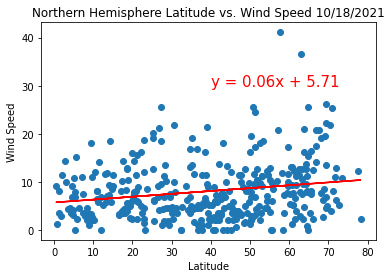

<Figure size 432x288 with 0 Axes>

In [43]:
# construct linear regression and scatter plot 
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40, 30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Northern Hemisphere Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save the plot as png
plt.savefig("Northern Hemisphere Latitude vs. Wind Speed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.026110083193459695


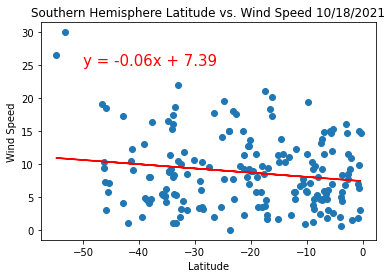

<Figure size 432x288 with 0 Axes>

In [44]:
# construct linear regression and scatter plot 
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50, 25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'Southern Hemisphere Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
print(f"The r-squared is: {rvalue**2}")
plt.show()

# save the plot as png
plt.savefig("Southern Hemisphere Latitude vs. Wind Speed.png")

### North/South Latitude vs. Wind Speed Scatterplot Observations
These scatter plots map over 500 randomly selected cities' latitudes in the northern and southern hemispheres against their wind speed. Both of the scatter plots show that there is no correlation between latitude and wind speed. Both linear regression equations have slopes close to zero, which suggests a weak correlation between the two attributes being displayed.